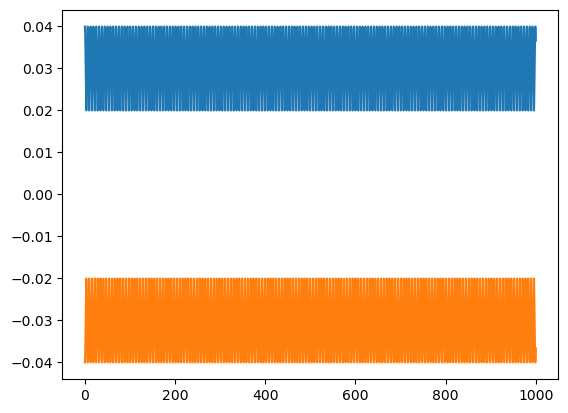

kappa: 0.1


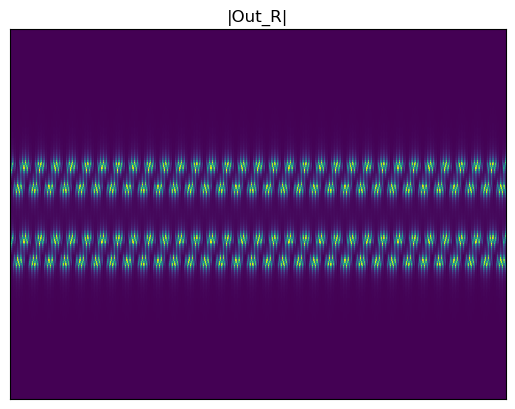

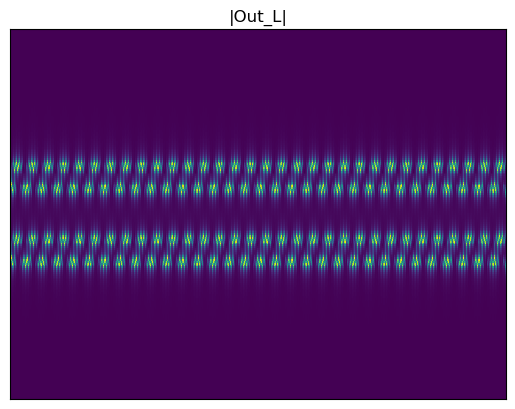

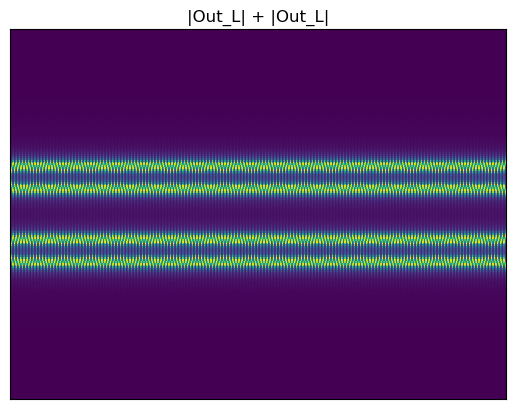

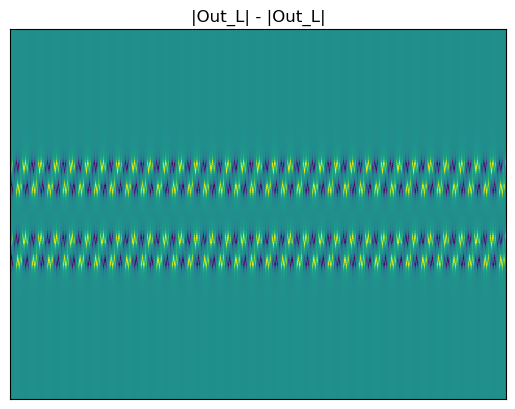

In [75]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep  6 23:08:47 2023

@author: S3923133
"""

##########################################################
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.colors as colors
# from pyplot.get_cmap('afmhot_u')
############ li2023direct - 03 ###########################


tstep = 1e-1

# Number of samples
N = 100000


# Frequency interval / resolution

fstep = 1 / N*tstep


# Frequency steps axis

f = np.linspace(0, (N-1)*fstep, N, endpoint=False)


fs = 20000

# Time steps axis
# kOmega_03 = np.linspace(0, (N-1)*tstep, N, endpoint=False)

kOmega_03 = np.linspace(0,1000,int(10*fs),endpoint=False)

# kOmega_03 = np.linspace(0, 4*np.pi, 201)

delta_Omega_03 = np.linspace(-0.5, 0.5, 201)

g1_03 = 0.03
g2_03 = 0.01


phi1_03 = 0*np.pi/180
phi2_03 = 0*np.pi/180


#
G = (g1_03*np.exp(-1j*phi1_03)) + (g2_03*np.exp(1j*(kOmega_03) + 1j*(phi2_03)))

phase = np.angle(G)

#%% Dispersion curve

epsilon_m_plus_03 = np.sqrt(g1_03**2 + g2_03**2 + 2*g1_03*g2_03*np.cos(kOmega_03 + phi1_03 + phi2_03))
epsilon_m_minus_03 = - np.sqrt(g1_03**2 + g2_03**2 + 2*g1_03*g2_03*np.cos(kOmega_03 + phi1_03 + phi2_03))

plt.plot(kOmega_03, epsilon_m_plus_03)
plt.plot(kOmega_03, epsilon_m_minus_03)
# plt.ylim(-6, 6)
plt.show()

### Band structure

kappa_03 = (4/20)/2

ratio = 10

print('kappa: {}'.format(kappa_03))

delta_Omega_03_plus = delta_Omega_03 - kappa_03
delta_Omega_03_minus = delta_Omega_03 + kappa_03

gamma_loss_03 = 0.01
gammaA = 0.2

PhiD_plus_03 = 1 / np.sqrt(2)
PhiC_plus_03 = np.exp(-1j*phase) / np.sqrt(2)

PhiD_minus_03 = 1 / np.sqrt(2)
PhiC_minus_03 = -1*np.exp(-1j*phase) / np.sqrt(2)

PhiD_plus_03_conj = 1 / np.sqrt(2)
PhiC_plus_03_conj = np.conjugate(PhiD_plus_03)      #np.exp(1j*phase) / np.sqrt(2)

PhiD_minus_03_conj = 1 / np.sqrt(2)
PhiC_minus_03_conj = np.conjugate(PhiD_minus_03)    #- np.exp(1j*phase) / np.sqrt(2)

### Initialize band structure arrays

OutR_TB_03_kappa_plus_m_plus = np.zeros((len(delta_Omega_03_plus), len(kOmega_03)), complex)
OutR_TB_03_kappa_plus_m_minus = np.zeros((len(delta_Omega_03_plus), len(kOmega_03)), complex)
OutR_TB_03_kappa_plus = np.zeros((len(delta_Omega_03_plus), len(kOmega_03)), complex)

OutR_TB_03_kappa_minus_m_plus = np.zeros((len(delta_Omega_03_minus), len(kOmega_03)), complex)
OutR_TB_03_kappa_minus_m_minus = np.zeros((len(delta_Omega_03_minus), len(kOmega_03)), complex)
OutR_TB_03_kappa_minus = np.zeros((len(delta_Omega_03_minus), len(kOmega_03)), complex)

for i in range(len(delta_Omega_03)):
    OutR_TB_03_kappa_plus_m_plus[i]  = (-1j*gammaA / 2) * (PhiC_plus_03_conj * (PhiC_plus_03 + PhiD_plus_03 * np.exp(2j * kOmega_03 / ratio)) / (delta_Omega_03_plus[i] - epsilon_m_plus_03 + 1j*gamma_loss_03))
    OutR_TB_03_kappa_plus_m_minus[i]  = (-1j*gammaA / 2) * (PhiC_minus_03_conj * (PhiC_minus_03 + PhiD_minus_03 * np.exp(2j * kOmega_03 / ratio))/ (delta_Omega_03_plus[i] - epsilon_m_minus_03  + 1j*gamma_loss_03))

    OutR_TB_03_kappa_plus = (OutR_TB_03_kappa_plus_m_plus + OutR_TB_03_kappa_plus_m_minus)*np.conjugate(OutR_TB_03_kappa_plus_m_plus + OutR_TB_03_kappa_plus_m_minus)

    OutR_TB_03_kappa_minus_m_plus[i] = (-1j*gammaA / 2) * (PhiD_plus_03_conj * (PhiC_plus_03 * np.exp(-2j * kOmega_03 / ratio) + PhiD_plus_03) / (delta_Omega_03_minus[i] - epsilon_m_plus_03 + 1j*gamma_loss_03) )
    OutR_TB_03_kappa_minus_m_minus[i] = (-1j * gammaA / 2) * (PhiD_minus_03_conj * (PhiC_minus_03 * np.exp(-2j * kOmega_03 / ratio) + PhiD_minus_03) / (delta_Omega_03_minus[i] - epsilon_m_minus_03 + 1j * gamma_loss_03))

    OutR_TB_03_kappa_minus = (OutR_TB_03_kappa_minus_m_minus + OutR_TB_03_kappa_minus_m_plus)*np.conjugate(OutR_TB_03_kappa_minus_m_minus + OutR_TB_03_kappa_minus_m_plus)

    OutR_TB_03_kappa = (OutR_TB_03_kappa_minus + OutR_TB_03_kappa_plus )

plt.imshow(np.abs(OutR_TB_03_kappa), interpolation='nearest', origin='lower', aspect='auto')
# plt.colorbar()
# plt.pcolor(kOmega_03, delta_Omega_03, np.abs(TB_03_kappa), vmin = 0.15, vmax=0.65)
# plt.imshow(np.abs(TB_03_kappa), interpolation='nearest', origin='lower', aspect='auto', cmap='afmhot_r', vmin = 0, vmax=50)
# plt.ylim(90, 130)

plt.tick_params(
axis='both',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
bottom=False,      # ticks along the bottom edge are off
top=False,         # ticks along the top edge are off
left=False,
right = False,
labelleft=False,
labelbottom=False) # labels along the bottom edge are off

# plt.savefig("5GHz.png", dpi=1000, bbox_inches='tight')
# v = np.linspace(0, 1.0, 2, endpoint=True)
# plt.colorbar()
plt.title("|Out_R|")
plt.show()

### Initialize band structure arrays

OutL_TB_03_kappa_plus_m_plus = np.zeros((len(delta_Omega_03_plus), len(kOmega_03)), complex)
OutL_TB_03_kappa_plus_m_minus = np.zeros((len(delta_Omega_03_plus), len(kOmega_03)), complex)
OutL_TB_03_kappa_plus = np.zeros((len(delta_Omega_03_plus), len(kOmega_03)), complex)

OutL_TB_03_kappa_minus_m_plus = np.zeros((len(delta_Omega_03_minus), len(kOmega_03)), complex)
OutL_TB_03_kappa_minus_m_minus = np.zeros((len(delta_Omega_03_minus), len(kOmega_03)), complex)
OutL_TB_03_kappa_minus = np.zeros((len(delta_Omega_03_minus), len(kOmega_03)), complex)

for i in range(len(delta_Omega_03)):
    OutL_TB_03_kappa_plus_m_plus[i]  = (-1j*gammaA / 2) * (PhiC_plus_03_conj * (PhiC_plus_03 - PhiD_plus_03 * np.exp(2j * kOmega_03 / ratio)) / (delta_Omega_03_plus[i] - epsilon_m_plus_03 + 1j*gamma_loss_03))
    OutL_TB_03_kappa_plus_m_minus[i]  = (-1j*gammaA / 2) * (PhiC_minus_03_conj * (PhiC_minus_03 - PhiD_minus_03 * np.exp(2j * kOmega_03 / ratio))/ (delta_Omega_03_plus[i] - epsilon_m_minus_03  + 1j*gamma_loss_03))

    OutL_TB_03_kappa_plus = (OutL_TB_03_kappa_plus_m_plus + OutL_TB_03_kappa_plus_m_minus)*np.conjugate(OutL_TB_03_kappa_plus_m_plus + OutL_TB_03_kappa_plus_m_minus)

    OutL_TB_03_kappa_minus_m_plus[i] = (-1j*gammaA / 2) * (PhiD_plus_03_conj * (PhiC_plus_03 * np.exp(-2j * kOmega_03 / ratio) - PhiD_plus_03) / (delta_Omega_03_minus[i] - epsilon_m_plus_03 + 1j*gamma_loss_03) )
    OutL_TB_03_kappa_minus_m_minus[i] = (-1j * gammaA / 2) * (PhiD_minus_03_conj * (PhiC_minus_03 * np.exp(-2j * kOmega_03 / ratio) - PhiD_minus_03) / (delta_Omega_03_minus[i] - epsilon_m_minus_03 + 1j * gamma_loss_03))

    OutL_TB_03_kappa_minus = (OutL_TB_03_kappa_minus_m_minus + OutL_TB_03_kappa_minus_m_plus)*np.conjugate(OutL_TB_03_kappa_minus_m_minus + OutL_TB_03_kappa_minus_m_plus)

    OutL_TB_03_kappa = (OutL_TB_03_kappa_minus + OutL_TB_03_kappa_plus )

plt.imshow(np.abs(OutL_TB_03_kappa), interpolation='nearest', origin='lower', aspect='auto')
# plt.colorbar()
# plt.pcolor(kOmega_03, delta_Omega_03, np.abs(TB_03_kappa), vmin = 0.15, vmax=0.65)
# plt.imshow(np.abs(TB_03_kappa), interpolation='nearest', origin='lower', aspect='auto', cmap='afmhot_r', vmin = 0, vmax=50)


# plt.ylim(90, 130)

plt.tick_params(
axis='both',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
bottom=False,      # ticks along the bottom edge are off
top=False,         # ticks along the top edge are off
left=False,
right = False,
labelleft=False,
labelbottom=False) # labels along the bottom edge are off

# plt.savefig("5GHz.png", dpi=1000, bbox_inches='tight')
# v = np.linspace(0, 1.0, 2, endpoint=True)
# plt.colorbar()
plt.title("|Out_L|")
plt.show()

#############################

plt.imshow(np.abs(OutR_TB_03_kappa) + np.abs(OutL_TB_03_kappa), interpolation='nearest', origin='lower', aspect='auto')
plt.tick_params(
axis='both',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
bottom=False,      # ticks along the bottom edge are off
top=False,         # ticks along the top edge are off
left=False,
right = False,
labelleft=False,
labelbottom=False) # labels along the bottom edge are off
plt.title("|Out_L| + |Out_L|")
plt.show()

##############################

plt.imshow(np.abs(OutR_TB_03_kappa) - np.abs(OutL_TB_03_kappa), interpolation='nearest', origin='lower', aspect='auto')
plt.tick_params(
axis='both',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
bottom=False,      # ticks along the bottom edge are off
top=False,         # ticks along the top edge are off
left=False,
right = False,
labelleft=False,
labelbottom=False) # labels along the bottom edge are off
plt.title("|Out_L| - |Out_L|")
plt.show()



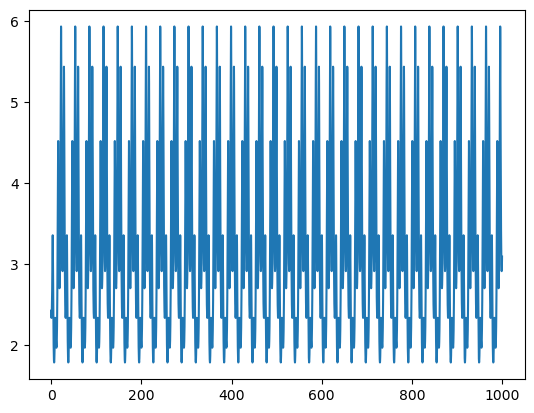

In [76]:
##############################

# from scipy.fft import fft, fftfreq, fftshift
from numpy.fft import fft

delta_Omega_03_plus = 0

TB_03_kappa_plus_m_plus_2 = np.zeros((1, len(kOmega_03)), complex)
TB_03_kappa_plus_m_minus_2 = np.zeros((1, len(kOmega_03)), complex)
TB_03_kappa_plus_2 = np.zeros((1, len(kOmega_03)), complex)

# TB_03_kappa_minus_m_plus_2 = np.zeros((len(delta_Omega_03_minus), len(kOmega_03)), complex)
# TB_03_kappa_minus_m_minus_2 = np.zeros((len(delta_Omega_03_minus), len(kOmega_03)), complex)
# TB_03_kappa_minus_2 = np.zeros((len(delta_Omega_03_minus), len(kOmega_03)), complex)


TB_03_kappa_plus_m_plus_2  = (-1j*gammaA / 2) * (PhiC_plus_03_conj * (PhiC_plus_03 + PhiD_plus_03 * np.exp(2j * kOmega_03 / ratio)) / (delta_Omega_03_plus - epsilon_m_plus_03 + 1j*gamma_loss_03))
TB_03_kappa_plus_m_minus_2  = (-1j*gammaA / 2) * (PhiC_minus_03_conj * (PhiC_minus_03 + PhiD_minus_03 * np.exp(2j * kOmega_03 / ratio))/ (delta_Omega_03_plus - epsilon_m_minus_03  + 1j*gamma_loss_03))

TB_03_kappa_plus_2 = (TB_03_kappa_plus_m_plus_2 + TB_03_kappa_plus_m_minus_2)#*np.conjugate(TB_03_kappa_plus_m_plus_2 + TB_03_kappa_plus_m_minus_2)

# TB_03_kappa_minus_m_plus_2[i] = (-1j*gammaA / 2) * (PhiD_plus_03_conj * (PhiC_plus_03 * np.exp(-2j * kOmega_03 / 8.67) + PhiD_plus_03) / (delta_Omega_03_minus[i] - epsilon_m_plus_03 + 1j*gamma_loss_03) )
# TB_03_kappa_minus_m_minus_2[i] = (-1j * gammaA / 2) * (PhiD_minus_03_conj * (PhiC_minus_03 * np.exp(-2j * kOmega_03 / 8.67) + PhiD_minus_03) / (delta_Omega_03_minus[i] - epsilon_m_minus_03 + 1j * gamma_loss_03))

# TB_03_kappa_minus_2 = (TB_03_kappa_minus_m_minus + TB_03_kappa_minus_m_plus)*np.conjugate(TB_03_kappa_minus_m_minus + TB_03_kappa_minus_m_plus)

TB_03_kappa_2 = (TB_03_kappa_plus_m_plus_2+TB_03_kappa_plus_m_minus_2)

# TB_03_kappa = (TB_03_kappa_minus + TB_03_kappa_plus)

plt.plot(kOmega_03, np.abs(TB_03_kappa_2))

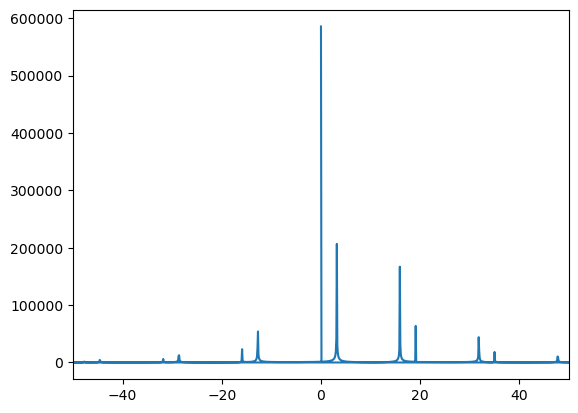

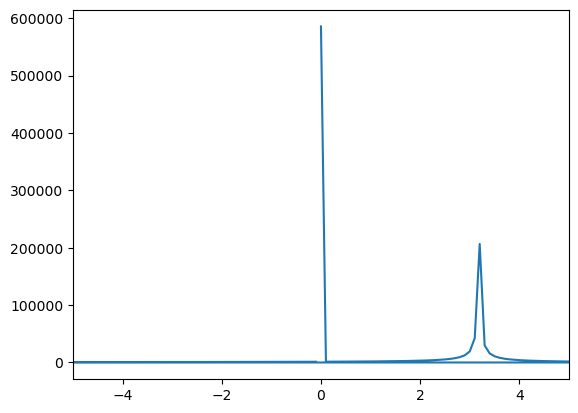

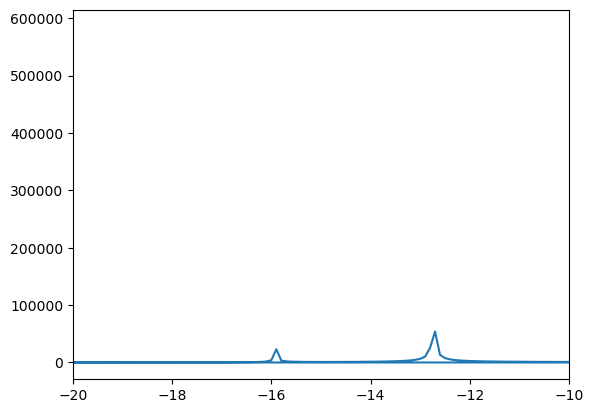

In [77]:
#%%
from numpy.fft import fft, fftfreq
from numpy import arange, linspace, sin, pi as π
from matplotlib import pyplot

# def FFT(t, y):
#     n = len(t)
#     Δ = (max(t) - min(t)) / (n-1)
#     k = int(n/2)
#     f = arange(k) / (n*Δ)
#     Y = abs(fft(y))[:k]
#     return (f, Y)

# def FFT(y):
#     # n = len(t)
#     # Δ = (max(t) - min(t)) / (n-1)
#     # k = int(n/2)
#     # f = fftfreq(n=y.size, d=1/N)
#     # Y = fft(y)
    
#     wave = y
    
#     fft_wave = np.fft.fft(wave)
    
#     fft_fre = np.fft.fftfreq(n=wave.size, d=1/fs)
    
#     return (f, Y)


fft_wave = np.fft.fft(TB_03_kappa_2)
    
fft_fre = np.fft.fftfreq(n=TB_03_kappa_2.size, d=1/fs)

plt.plot(fft_fre, abs(fft_wave), label="Real part")

plt.xlim(-50,50)
plt.savefig("000_003.png")
plt.show()

# plt.plot(fft_fre, abs(fft_wave), label="Real part")

# plt.xlim(0,5)

# plt.show()

fft_wave = np.fft.fft(TB_03_kappa_2)
    
fft_fre = np.fft.fftfreq(n=TB_03_kappa_2.size, d=1/fs)

plt.plot(fft_fre, abs(fft_wave), label="Real part")

plt.xlim(-5, 5)
plt.show()


fft_wave = np.fft.fft(TB_03_kappa_2)
    
fft_fre = np.fft.fftfreq(n=TB_03_kappa_2.size, d=1/fs)

plt.plot(fft_fre, abs(fft_wave), label="Real part")

plt.xlim(-20,-10)
plt.show()



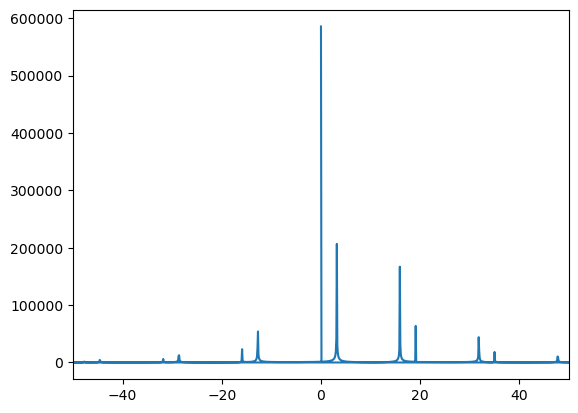

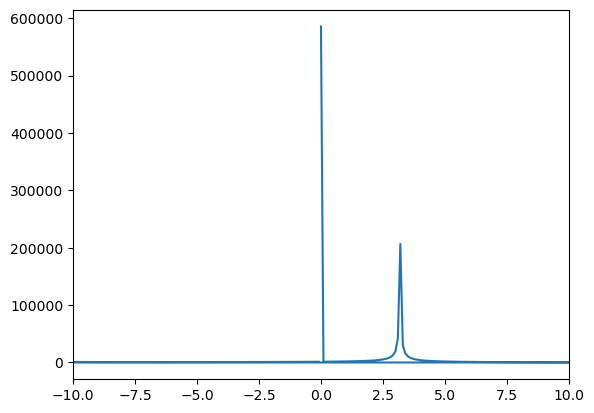

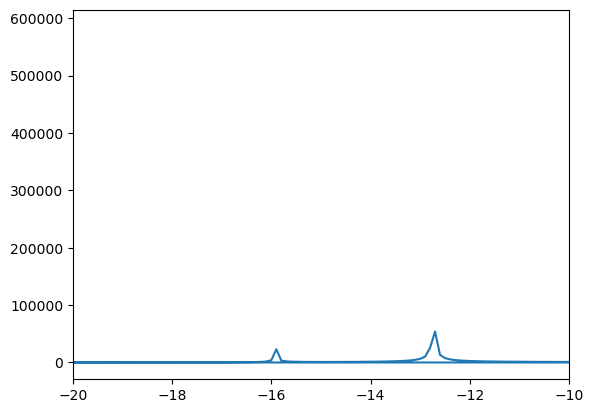

In [78]:
#%%
from numpy.fft import fft, fftfreq
from numpy import arange, linspace, sin, pi as π
from matplotlib import pyplot

# def FFT(t, y):
#     n = len(t)
#     Δ = (max(t) - min(t)) / (n-1)
#     k = int(n/2)
#     f = arange(k) / (n*Δ)
#     Y = abs(fft(y))[:k]
#     return (f, Y)

# def FFT(y):
#     # n = len(t)
#     # Δ = (max(t) - min(t)) / (n-1)
#     # k = int(n/2)
#     # f = fftfreq(n=y.size, d=1/N)
#     # Y = fft(y)
    
#     wave = y
    
#     fft_wave = np.fft.fft(wave)
    
#     fft_fre = np.fft.fftfreq(n=wave.size, d=1/fs)
    
#     return (f, Y)


fft_wave = np.fft.fft(TB_03_kappa_2)
    
fft_fre = np.fft.fftfreq(n=TB_03_kappa_2.size, d=1/fs)

plt.plot(fft_fre, abs(fft_wave), label="Real part")

plt.xlim(-50, 50)
plt.savefig("003_002.png")
plt.show()

# plt.plot(fft_fre, abs(fft_wave), label="Real part")

# plt.xlim(0,5)

# plt.show()

fft_wave = np.fft.fft(TB_03_kappa_2)
    
fft_fre = np.fft.fftfreq(n=TB_03_kappa_2.size, d=1/fs)

plt.plot(fft_fre, abs(fft_wave), label="Real part")

plt.xlim(-10, 10)
plt.show()


fft_wave = np.fft.fft(TB_03_kappa_2)
    
fft_fre = np.fft.fftfreq(n=TB_03_kappa_2.size, d=1/fs)

plt.plot(fft_fre, abs(fft_wave), label="Real part")

plt.xlim(-20,-10)

plt.show()



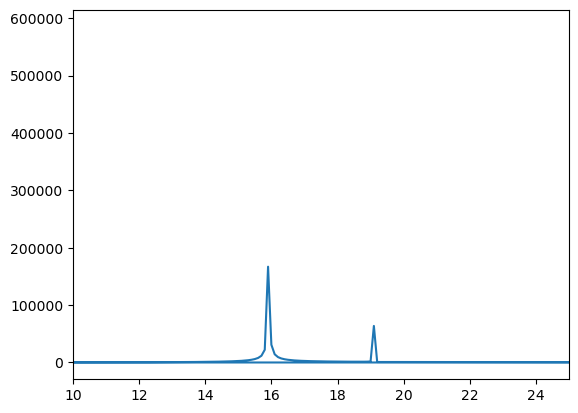

In [79]:
fft_wave = np.fft.fft(TB_03_kappa_2)
    
fft_fre = np.fft.fftfreq(n=TB_03_kappa_2.size, d=1/fs)

plt.plot(fft_fre, abs(fft_wave), label="Real part")

plt.xlim(10,25)
plt.show()

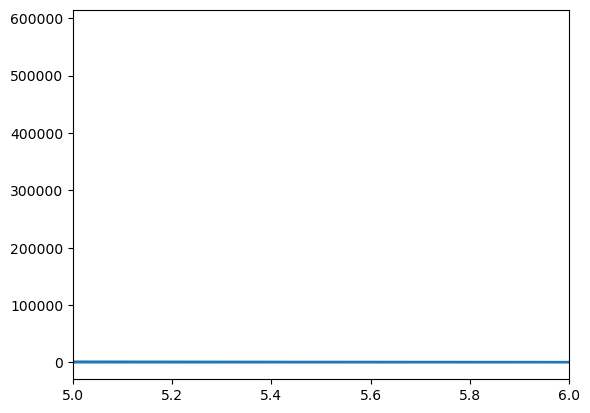

In [80]:
fft_wave = np.fft.fft(TB_03_kappa_2)
    
fft_fre = np.fft.fftfreq(n=TB_03_kappa_2.size, d=1/fs)

plt.plot(fft_fre, abs(fft_wave), label="Real part")

plt.xlim(5,6)
plt.show()